# GIS Scratchbook

## Geopandas Example

In [3]:
import geopandas
import rasterio
import pprint
from rasterio import features
import rasterio.plot
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [4]:
# Import raster file
currents = rasterio.open('data/Surface Currents.tif')

In [5]:
# Create sampling points
#points = [Point(400000, 4400000), Point(600000, 4400000), Point(400000, 4600000), Point(600000, 4600000)]
#gdf = geopandas.GeoDataFrame([1, 2, 3, 4], geometry=points, crs=32630)

In [5]:
currents.bounds

BoundingBox(left=-91913.6706, bottom=4255261.1754, right=788051.388, top=5026667.5409)

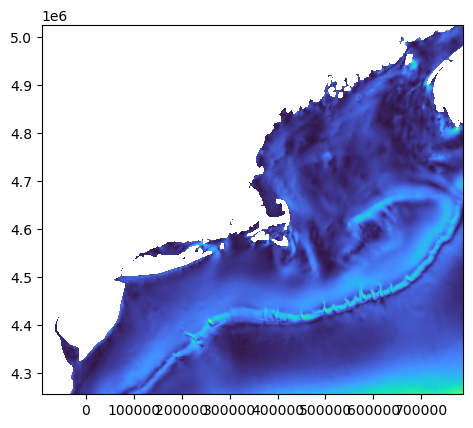

In [7]:
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[currents.bounds[0], currents.bounds[2], currents.bounds[1], currents.bounds[3]]
ax = rasterio.plot.show(currents, extent=extent, ax=ax, cmap='turbo')

#gdf.plot(ax=ax, color='red')

In [7]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]
gdf['value'] = [x for x in currents.sample(coord_list)]
gdf.head()

,0,geometry,value
0,1,POINT (400000.000 4400000.000),"[0.0742688, 181.08922]"
1,2,POINT (600000.000 4400000.000),"[0.070704386, 81.71301]"
2,3,POINT (400000.000 4600000.000),"[0.08844339, 73.10852]"
3,4,POINT (600000.000 4600000.000),"[0.04151321, 44.972664]"


# Notes
* Search for region meeting limits
* Look into conferences for GIS and MSP, next spring or summer
* Arezoo is working on abstract for ISOPE
* Code in modules.py to import local conditions

## GIS Handler Usage

In [1]:
import gis_handler

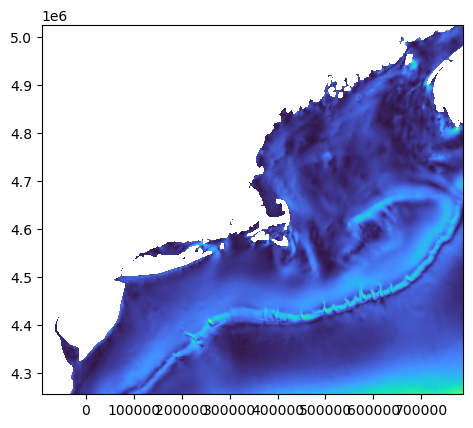

In [2]:
raster_files = {'current': 'data/Surface Currents.tif',
                'chlorophyll': 'data/Summer Chlorophyll.tif',
                'temperature': 'data/Surface Temperature.tif'}

handler = gis_handler.Handler(raster_files)
handler.display_raster('current')

In [3]:
for i in handler.raster_data:
    print(i.extent)

AttributeError: 'str' object has no attribute 'extent'